In [1]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 4.2 MB/s 
     |████████████████████████████████| 15.4 MB 34.0 MB/s 
     |████████████████████████████████| 6.3 MB 39.2 MB/s 


In [2]:
pip install contextily

     |████████████████████████████████| 19.3 MB 1.5 MB/s 


In [ ]:
%matplotlib inline

import pandas as pd
import geopandas
import contextily 
import xyzservices.providers as xyz
import matplotlib.pyplot as plt

In [ ]:
from shapely.geometry import LineString
from shapely.geometry import Point
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#1. visualizzi i parchi di Milano e i comuni che vi fanno parte (vedi immagine allegata)

In [ ]:
Parchi_Milano = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/Parchi_Regionali/Parchi_regionali_e_nazionali_polygon.zip")
Parchi_Milano 

In [ ]:
Parchi_Milano_squeeze = Parchi_Milano.geometry.squeeze()
Parchi_Milano_squeeze

0     POLYGON ((587577.037 5107497.548, 587615.036 5...
1     POLYGON ((586196.195 5100871.221, 586351.566 5...
2     POLYGON ((486537.216 5078441.081, 486530.341 5...
3     POLYGON ((617860.123 5053114.432, 617863.431 5...
4     POLYGON ((584084.298 5161019.100, 583763.056 5...
5     POLYGON ((611429.112 5154022.734, 612080.475 5...
6     POLYGON ((584084.298 5161019.100, 584083.048 5...
7     POLYGON ((617719.939 5125721.072, 617744.313 5...
8     POLYGON ((533258.682 5067541.607, 533248.433 5...
9     POLYGON ((476666.268 5067282.167, 476899.067 5...
10    POLYGON ((503128.548 5073530.075, 503147.548 5...
11    POLYGON ((530035.026 5077348.997, 530099.399 5...
12    POLYGON ((566862.701 5044980.915, 566850.701 5...
13    POLYGON ((551172.408 5063194.271, 551171.818 5...
14    POLYGON ((530460.139 5059979.758, 530448.139 5...
15    POLYGON ((519023.300 5071249.811, 519020.695 5...
16    POLYGON ((508880.762 5069982.391, 508899.778 5...
17    POLYGON ((492571.508 5069463.220, 492567.1

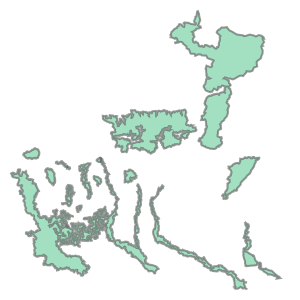

In [ ]:
Parchi_Milano_Union = Parchi_Milano_squeeze.unary_union
Parchi_Milano_Union

In [ ]:
Comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/Regioni/Limiti01012021_g/Com01012021_g")
Comuni 

In [ ]:
Parchi_Comuni = Comuni[Comuni.intersects(Parchi_Milano_Union)]
Parchi_Comuni

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
399,1,1,3,0,3,3016,003016,Bellinzago Novarese,None,0,27485.780028,3.836861e+07,"POLYGON ((476111.334 5047065.007, 476114.027 5..."
410,1,1,3,0,3,3032,003032,Cameri,None,0,29265.346956,4.083069e+07,"POLYGON ((477085.457 5044699.027, 477081.020 5..."
417,1,1,3,0,3,3043,003043,Castelletto sopra Ticino,None,0,18446.745417,1.493419e+07,"POLYGON ((469419.417 5063663.891, 469892.322 5..."
421,1,1,3,0,3,3049,003049,Cerano,None,0,29314.340563,3.302167e+07,"POLYGON ((486415.951 5031022.135, 486143.952 5..."
430,1,1,3,0,3,3068,003068,Galliate,None,0,29706.630508,2.914545e+07,"POLYGON ((477438.767 5040756.060, 477600.865 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7737,1,3,108,0,108,108047,108047,Veduggio con Colzano,None,0,7986.758681,3.390555e+06,"POLYGON ((519686.705 5065270.380, 519754.706 5..."
7738,1,3,108,0,108,108048,108048,Verano Brianza,None,0,9171.724083,3.667862e+06,"POLYGON ((517613.394 5060787.396, 518293.122 5..."
7739,1,3,108,0,108,108049,108049,Villasanta,None,0,9629.121636,4.645122e+06,"POLYGON ((523356.646 5052024.704, 523490.961 5..."
7743,1,3,108,0,108,108053,108053,Cornate d'Adda,None,0,15414.910444,1.364665e+07,"POLYGON ((537678.573 5057235.438, 537951.570 5..."


In [ ]:
Parchi_Senza_Comuni = Comuni[~Comuni.intersects(Parchi_Milano_Union)]
Parchi_Senza_Comuni

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,1001,001001,AgliÃ¨,None,0,16097.848297,1.330696e+07,"POLYGON ((404703.558 5026682.655, 405359.554 5..."
1,1,1,1,201,201,1002,001002,Airasca,None,0,16684.218599,1.595353e+07,"POLYGON ((380700.909 4977305.520, 381105.998 4..."
2,1,1,1,201,201,1003,001003,Ala di Stura,None,0,29892.674582,4.575189e+07,"POLYGON ((364710.857 5022090.678, 364737.794 5..."
3,1,1,1,201,201,1004,001004,Albiano d'Ivrea,None,0,16192.656480,1.103356e+07,"POLYGON ((415942.504 5033304.609, 416079.315 5..."
4,1,1,1,201,201,1006,001006,Almese,None,0,16077.245089,1.771710e+07,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,5,20,111,0,111,111103,111103,Villaputzu,None,0,100515.537851,1.807260e+08,"MULTIPOLYGON (((556602.772 4375162.650, 556598..."
7899,5,20,111,0,111,111104,111104,Villasalto,None,0,58635.095264,1.303933e+08,"POLYGON ((541186.146 4375105.653, 541180.146 4..."
7900,5,20,111,0,111,111105,111105,Villasimius,None,0,49735.818257,5.759282e+07,"MULTIPOLYGON (((546451.098 4325900.553, 546443..."
7901,5,20,111,0,111,111106,111106,Villasor,None,0,53375.684321,8.640693e+07,"POLYGON ((500362.475 4361229.767, 500397.474 4..."


In [ ]:
ax = Parchi_Milano.to_crs(epsg=3857).plot(figsize=(20,20),markersize = 20)
Parchi_Comuni.to_crs(epsg=3857).plot(ax=ax, facecolor= "none", edgecolor = "k")
contextily.add_basemap(ax)

Output hidden; open in https://colab.research.google.com to view.